<a href="https://colab.research.google.com/github/Samar2411/Python_Paper_Airplanes/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 5

**Numpy and Pandas Part II!**

Lesson Goals:
- Learn to manipulate Pandas Series and Dataframes:
  
            A. Series
              i. Create a Series
              ii. Index a Series 
              iii. Basic Series Operations
            B. Dataframes
              i. Create a DataFrame
                a. Adding and Dropping Series
                b. Indexing and Conditional Selection
              ii. Hierarchical DataFrames
                a. Boolean
                b. xs
                c. Groupby
              iii. Methods and Operations
                a. Treating Null Values
                b. Join, Merge, Concatenate
                c. Apply



# Numpy and Pandas Part 2

Pandas has two main data structures you need to work with, series and dataframe. The main advantages in pandas are index labels. 

When we want to work with data that has labels and columns, we will need to use the Panda Series and DataFrame structures. While an array uses numerical indices, we can use a DataFrame if we want to organize data with string labels.

As a reminder to import a library, you use the syntax import Library as alias.

In [ ]:
import numpy as np
import pandas as pd
from numpy.random import randn

We can convert a dictionary, list or array to a Pandas Series with the pd.series() method. But when you convert a list to a series the index number is the label while in the case of a dictionary, it is the key. 

Alternatively you can load in two lists to have a label and data set.

We can add a label by inserting another array. If we do that, we need to specficy that one array is the data and the other is the index.

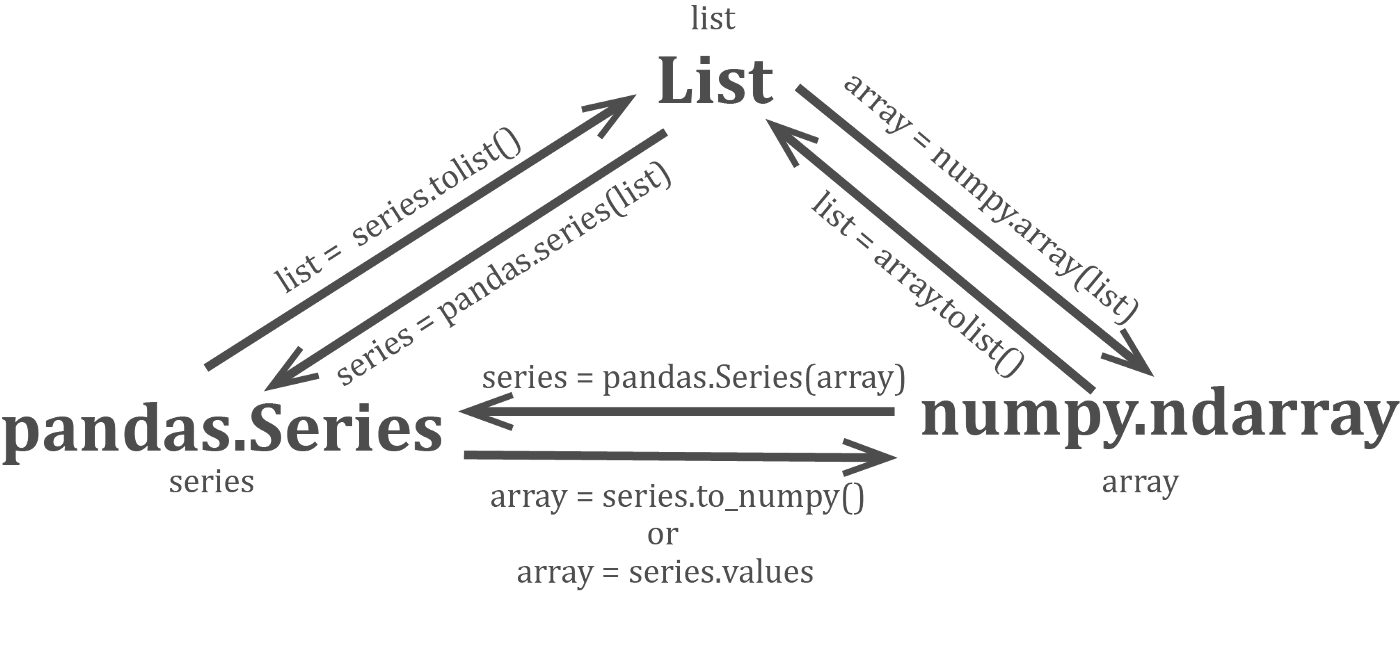



In [ ]:
list1 = ['A','B','C','D']
list2 = [1,2,3,4]
#Turn one list into an series
panda1 = pd.Series(list1)
#Turn two lists into an series 
panda2 = pd.Series(data = list1, index = list2)
dict1 = {'A':1, 'B':2, 'C':3}
#Turn dictionary into an series
panda3 = pd.Series(dict1)
print(panda1)
print(panda2)
print(panda3)
#input data into a series
panda4 = pd.Series(['alpha', 'beta', 'gamma'])
print(panda4)
list3 = np.zeros(6)
#Turn array into a series
array = np.array(list3)
panda5 = pd.Series(array)
panda5

0    A
1    B
2    C
3    D
dtype: object
1    A
2    B
3    C
4    D
dtype: object
A    1
B    2
C    3
dtype: int64
0    alpha
1     beta
2    gamma
dtype: object


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
dtype: float64

Indexing Series

It is very similar to pulling data from a dictionary. Series[Label] will retireve the value.

In [ ]:
list1 = ['alpha', 'beta', 'gamma']
list2 = ['a', 'b', 'c']
panda = pd.Series(data = list1, index = list2)
print(panda)
panda['a']

a    alpha
b     beta
c    gamma
dtype: object


'alpha'

Adding Series is a little strange because it will look for all the labels in two series and try to add only the data. 

In [ ]:
list1 = [10, 20, 30]
list2 = [40, 50, 60]
index = ['a', 'b', 'c']
panda1 = pd.Series(data = list1, index = index)
panda2 = pd.Series(data = list2, index = index)
panda3 = panda1 + panda2
print(panda1)
print(panda2)
print(panda3/2)

a    10
b    20
c    30
dtype: int64
a    40
b    50
c    60
dtype: int64
a    25.0
b    35.0
c    45.0
dtype: float64


So far we learned series because it is good at holding 1-diminesional data. If we want something more complex, we will need to use DataFrames. In many ways, it can be thought of as several Series sharing an index label. To create one, you need index names, data and column names.  

If you run type on one of the columns, you can actually see that python considers it a series. 

If we want to create a dataframe, we say DF = pd.DataFrame(data, list_index, list_columnnames)

To access data, we need to use DF['columnname'] for columns and DF.loc['rowname']

In [ ]:
DF = pd.DataFrame(randn(6,3), ['A','B', 'C', 'D', 'E', 'F'], ['alpha', 'beta', 'gamma'])
print(DF)






      alpha      beta     gamma
A -0.644272  0.288267  0.820880
B  1.267378 -0.867448 -1.974921
C -0.477274 -0.402936 -0.782003
D  0.796576 -1.022828 -1.103368
E  0.434044  0.508078  0.193347
F -1.221331  0.785907  0.341058


In [ ]:
print(DF['alpha'])
print(DF.loc['A'])

A   -0.644272
B    1.267378
C   -0.477274
D    0.796576
E    0.434044
F   -1.221331
Name: alpha, dtype: float64
alpha   -0.644272
beta     0.288267
gamma    0.820880
Name: A, dtype: float64


In [ ]:
print(type(DF))
type(DF['alpha'])

<class 'pandas.core.frame.DataFrame'>


pandas.core.series.Series

If we need to create a new column, use DataFrame[New] = pd.df[Column_Name1] + df [ColumnName2]. To drop a column, you use DataFrame.Drop[ColumnName, axis = Axiz_Number, inplace = True]. The axis number is the dimension, for example axis = 0 is the labels and axis = 1 is the columns.

Furthremore, if we want to add a totally new column, we can use DataFrame[Name] = ['Entry1', 'Entry2'], etc. 

In [ ]:
DF = pd.DataFrame(randn(6,3), ['A','B', 'C', 'D', 'E', 'F'], ['alpha', 'beta', 'gamma'])
print(DF)
series = pd.Series([1, 2, 3, 4, 5, 6], ['A','B', 'C', 'D', 'E', 'F'])
series


      alpha      beta     gamma
A -0.150019  0.950763  1.439720
B  1.441601  0.905062  0.635300
C  1.780286 -0.499476 -0.721771
D  2.166060 -0.398023  1.826567
E -2.248796  0.194905  1.094818
F  0.670165 -1.259937  1.303650


A    1
B    2
C    3
D    4
E    5
F    6
dtype: int64

In [ ]:
DF['omega'] =  series
print(DF)
DF.drop('beta', axis = 1, inplace = True)
print(DF)

      alpha      beta     gamma  omega
A  1.936322 -0.092597 -0.427775      1
B  1.254017  1.333730  2.080958      2
C  0.206587  0.066334 -1.465746      3
D  2.518308 -0.744656  1.530438      4
E  1.734541 -0.674885 -3.025610      5
F  1.011822  1.671231 -0.295494      6
      alpha     gamma  omega
A  1.936322 -0.427775      1
B  1.254017  2.080958      2
C  0.206587 -1.465746      3
D  2.518308  1.530438      4
E  1.734541 -3.025610      5
F  1.011822 -0.295494      6


To index on a Pandas DataFrame, use the syntax, DataFrame[Column_Name] or DataFrame.[Column_Name]. But best to avoid the DataFrame.[Column_Name] format because it is also how you call methods. 

To get back multiple columns, get DataFrame[[Column_Name1, Column_Name2]]. To get rows, we need use a method, DataFrame.loc[['RowName1', 'RowName2']].  DataFrame.iloc[Index_Position1, 'Index_Position2'].



In [ ]:
list1 = np.random.randint(0,100,25)
array = list1.reshape(5,5)
print(array)
DF = pd.DataFrame(array, ['StoreA', 'StoreB', 'StoreC', 'StoreD', 'StoreE'], [2000, 2001, 2002 , 2003, 2004])
print(DF)
print(DF[[2001, 2002]])
print(DF.loc[['StoreA','StoreB']])



[[74 57 98 59  0]
 [67 59  8 87 71]
 [40 30 68 48 67]
 [50 48 10 49 66]
 [61  9 40 91 93]]
        2000  2001  2002  2003  2004
StoreA    74    57    98    59     0
StoreB    67    59     8    87    71
StoreC    40    30    68    48    67
StoreD    50    48    10    49    66
StoreE    61     9    40    91    93
        2001  2002
StoreA    57    98
StoreB    59     8
StoreC    30    68
StoreD    48    10
StoreE     9    40
        2000  2001  2002  2003  2004
StoreA    74    57    98    59     0
StoreB    67    59     8    87    71


We can also use commas to get rows and columns. DataFrames.loc['LabelName', 'ColumnName].

In [ ]:
print(DF.loc['StoreA', 2000])

34


To get a subset, DataFrames.loc[['LabelName1', 'LabelName2'] ['ColumnName1, ColumnName2]'], etc.

In [ ]:
print(DF.loc[['StoreA', 'StoreB'], [2000, 2001]])

        2000  2001
StoreA    34    38
StoreB    44    95


We can also use conditional selection to get only data that meets a condition. So DataFrame > 0 gives me a DataFrame with all the positive numbers.

You can also assign this Boolean expression to a new DataFrame with new_DataFrame = DataFrame > 0 . new_DataFrame is a DataFrame of True and False. If you use DataFrame[new_DataFrame], you get all the values that meet the condition and NaN for all the ones that dont. 



In [ ]:
list1 = np.random.randint(0,100,36)
array = list1.reshape(6,6)
print(array)
DF = pd.DataFrame(array, ['StoreA', 'StoreB', 'StoreC', 'StoreD', 'StoreE', 'StoreF'], [2000, 2001, 2002 , 2003, 2004, 2005])
print(DF)
print(DF[DF>10])
Bool = DF>10 
print(Bool)
print(DF[Bool])


[[87 43 53 93 76 88]
 [81  2 41  6  8 31]
 [69 71 64 28 27 66]
 [13 25 86  1 43 80]
 [23 37 39 71 40  8]
 [89 98 60 81 26 50]]
        2000  2001  2002  2003  2004  2005
StoreA    87    43    53    93    76    88
StoreB    81     2    41     6     8    31
StoreC    69    71    64    28    27    66
StoreD    13    25    86     1    43    80
StoreE    23    37    39    71    40     8
StoreF    89    98    60    81    26    50
        2000  2001  2002  2003  2004  2005
StoreA    87  43.0    53  93.0  76.0  88.0
StoreB    81   NaN    41   NaN   NaN  31.0
StoreC    69  71.0    64  28.0  27.0  66.0
StoreD    13  25.0    86   NaN  43.0  80.0
StoreE    23  37.0    39  71.0  40.0   NaN
StoreF    89  98.0    60  81.0  26.0  50.0
        2000   2001  2002   2003   2004   2005
StoreA  True   True  True   True   True   True
StoreB  True  False  True  False  False   True
StoreC  True   True  True   True   True   True
StoreD  True   True  True  False   True   True
StoreE  True   True  True   True   T

You can also do this conditional selection on rows . DataFrame[DataFrame[Column1]>0] will create a set of true and false values and remove the rows with False. You can also choose which columns to display. DataFrame[DataFrame[Column1]>0]['Column1', 'Column2']

In [ ]:
print(DF[2000]>50)
print(DF[DF[2000]>50])
print(DF[DF[2000]>50][[2002, 2003]])

StoreA     True
StoreB     True
StoreC     True
StoreD    False
StoreE    False
StoreF     True
Name: 2000, dtype: bool
        2000  2001  2002  2003  2004  2005
StoreA    87    43    53    93    76    88
StoreB    81     2    41     6     8    31
StoreC    69    71    64    28    27    66
StoreF    89    98    60    81    26    50
        2002  2003
StoreA    53    93
StoreB    41     6
StoreC    64    28
StoreF    60    81


To get multiple conditions, You need to get the & symbol DataFrame[DataFrame[Column1]>0 & DataFrame[Column2]>0]. The "or" conditional is the | symbol. 

In [ ]:
list1 = np.random.randint(0,100,25)
array = list1.reshape(5,5)
print(array)
DF = pd.DataFrame(array, ['StoreA', 'StoreB', 'StoreC', 'StoreD', 'StoreE'], [2000, 2001, 2002 , 2003, 2004])
print(DF)
print(DF[(DF[2001]>10) & (DF[2003]<80)])
print(DF[(DF[2001]>10) | (DF[2003]<80)])

[[90  5 59 72 86]
 [36 68 87  1 16]
 [95 71 98 14 34]
 [36 55 33 47 78]
 [96 47  6 64 91]]
        2000  2001  2002  2003  2004
StoreA    90     5    59    72    86
StoreB    36    68    87     1    16
StoreC    95    71    98    14    34
StoreD    36    55    33    47    78
StoreE    96    47     6    64    91
        2000  2001  2002  2003  2004
StoreB    36    68    87     1    16
StoreC    95    71    98    14    34
StoreD    36    55    33    47    78
StoreE    96    47     6    64    91
        2000  2001  2002  2003  2004
StoreA    90     5    59    72    86
StoreB    36    68    87     1    16
StoreC    95    71    98    14    34
StoreD    36    55    33    47    78
StoreE    96    47     6    64    91


In [ ]:
print(DF[(DF[2001]>10) & (DF[2003]<80)])
print(DF[(DF[2001]>10) | (DF[2003]<80)])

        2000  2001  2002  2003  2004
StoreA    74    57    98    59     0
StoreC    40    30    68    48    67
StoreD    50    48    10    49    66
        2000  2001  2002  2003  2004
StoreA    74    57    98    59     0
StoreB    67    59     8    87    71
StoreC    40    30    68    48    67
StoreD    50    48    10    49    66


If you ever want to use the numerical index as the labels as a series, you can use DataFrame.resetinex().


In [ ]:
list1 = np.random.randint(0,100,25)
array = list1.reshape(5,5)
print(array)
DF = pd.DataFrame(array, ['StoreA', 'StoreB', 'StoreC', 'StoreD', 'StoreE'], [2000, 2001, 2002 , 2003, 2004])
print(DF)
print(DF.reset_index())


[[69 37 99 16 99]
 [78 18 97 82 99]
 [39 71 35 20 82]
 [39 72 33 72 66]
 [51 30 91 16 95]]
        2000  2001  2002  2003  2004
StoreA    69    37    99    16    99
StoreB    78    18    97    82    99
StoreC    39    71    35    20    82
StoreD    39    72    33    72    66
StoreE    51    30    91    16    95
    index  2000  2001  2002  2003  2004
0  StoreA    69    37    99    16    99
1  StoreB    78    18    97    82    99
2  StoreC    39    71    35    20    82
3  StoreD    39    72    33    72    66
4  StoreE    51    30    91    16    95



If you want to set a new column as the index, use DataFrame.setindex. 

In [ ]:
DF.set_index(2004)


,2000,2001,2002,2003
2004,,,,
99,69,37,99,16
99,78,18,97,82
82,39,71,35,20
66,39,72,33,72
95,51,30,91,16


We can also create a DataFrame with multiple labels.To do this we need to create a list of tuples to feed in as a label. If you need to create a list of tuples out of two lists, use list(zip(list1, list2)). To do this, you need to use pd.MultiIndex.fromtuples(list_of_tuples) in order to turn it into a hierarchical label. We then use pd.DataFrames(randn(6,2), hierarchical_index, [list_column]).





In [ ]:
list1 = ['a', 'a', 'b', 'b']
list2 = [1, 2, 1, 2]
hierarchy = list(zip(list1,list2))
hierarchy = pd.MultiIndex.from_tuples(hierarchy) 
print(hierarchy)

DF = pd.DataFrame(randn(4,3), hierarchy, ['Column_A', 'Column_B', 'Column_C'])
print(DF)

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
     Column_A  Column_B  Column_C
a 1  0.227103  0.667690  1.852063
  2 -1.920041  0.433140 -0.966099
b 1  0.304904 -0.360670 -0.591793
  2 -0.682482  0.716959 -0.322614


To index off a hierarchical index, use df.loc[outer_index].loc[inner_index][ColumnName].  

In [ ]:
list1 = ['a', 'a', 'b', 'b', 'c', 'c']
list2 = [1, 2, 1, 2, 1,2]
hierarchy = list(zip(list1,list2))
hierarchy = pd.MultiIndex.from_tuples(hierarchy) 
print(hierarchy)

DF = pd.DataFrame(randn(6,4), hierarchy, ['Column_A', 'Column_B', 'Column_C', 'Column_D'])
print(DF)
print(DF.loc['b'].loc[1])
print(DF.loc['b'].loc[1]['Column_A'])
DF.index.names = ['letter_index', 'number_index']
print(DF)
print(DF.xs('a'))
print(DF.xs(1, level = 'number_index'))

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )
     Column_A  Column_B  Column_C  Column_D
a 1 -0.160442  1.535866  1.625456 -1.184178
  2  1.077600  1.174603 -0.814294  0.835615
b 1  0.565328  2.103955 -2.108741 -0.631224
  2  0.432389 -1.243233  0.688955  0.354992
c 1  0.718954  0.749015  0.073957 -0.709104
  2  0.416787 -0.574880 -1.842869  1.174970
Column_A    0.565328
Column_B    2.103955
Column_C   -2.108741
Column_D   -0.631224
Name: 1, dtype: float64
0.5653281445212966
                           Column_A  Column_B  Column_C  Column_D
letter_index number_index                                        
a            1            -0.160442  1.535866  1.625456 -1.184178
             2             1.077600  1.174603 -0.814294  0.835615
b            1             0.565328  2.103955 -2.108741 -0.631224
             2             0.432389 -1.243233  0.688955  0.354992
c            1         

We can then give then names with DF.Index.Names = [Name1, Name2].

In [ ]:
DF.index.names = ['letter_index', 'number_index']
print(DF)


                           Column_A  Column_B  Column_C  Column_D
letter_index number_index                                        
a            1            -0.160442  1.535866  1.625456 -1.184178
             2             1.077600  1.174603 -0.814294  0.835615
b            1             0.565328  2.103955 -2.108741 -0.631224
             2             0.432389 -1.243233  0.688955  0.354992
c            1             0.718954  0.749015  0.073957 -0.709104
             2             0.416787 -0.574880 -1.842869  1.174970


To access just the outer of the hierarchy labels, we could use DataFrames.xs['Index']. If two outer indices have a common inner index, you can use DataFrame.xs[Labelname, level = 'Name_of_hierarchy_label"]. 

In [ ]:
print(DF.xs('a'))
print(DF.xs(1, level = 'number_index'))

If you have missing values, you can get rid of them with DataFrames.dropna(). You can axis argument to specify if you want to drop all of the rows with axis = 0, the default or colummns with axis = 1. You can then add a threshold argument which states how many missing values you need more than to have in order to get rid of a row or column.


In [ ]:
list1 = np.random.randint(0,100,36)
array = list1.reshape(6,6)
print(array)
DF = pd.DataFrame(array, ['StoreA', 'StoreB', 'StoreC', 'StoreD', 'StoreE', 'StoreF'], [2000, 2001, 2002 , 2003, 2004, 2005])
print(DF)
new_DF = DF[DF>40]
print(new_DF)
print(new_DF.dropna())

[[76 79 36 31 63 65]
 [14 65 88 91 46 69]
 [ 9 74 47 49 49 47]
 [82 72 90 29 90 79]
 [55 61 94 64  9 30]
 [88 81 99 14 69 68]]
        2000  2001  2002  2003  2004  2005
StoreA    76    79    36    31    63    65
StoreB    14    65    88    91    46    69
StoreC     9    74    47    49    49    47
StoreD    82    72    90    29    90    79
StoreE    55    61    94    64     9    30
StoreF    88    81    99    14    69    68
        2000  2001  2002  2003  2004  2005
StoreA  76.0    79   NaN   NaN  63.0  65.0
StoreB   NaN    65  88.0  91.0  46.0  69.0
StoreC   NaN    74  47.0  49.0  49.0  47.0
StoreD  82.0    72  90.0   NaN  90.0  79.0
StoreE  55.0    61  94.0  64.0   NaN   NaN
StoreF  88.0    81  99.0   NaN  69.0  68.0
Empty DataFrame
Columns: [2000, 2001, 2002, 2003, 2004, 2005]
Index: []


You can use an axis argument to specify if you want to drop all of the rows with axis = 0, the default or colummns with axis = 1. You can then add a threshold argument which states how many missing values you need more than to have in order to get rid of a row or column.

In [ ]:
print(new_DF.dropna(axis = 1))
print(new_DF.dropna(thresh = 3))

        2001
StoreA    79
StoreB    65
StoreC    74
StoreD    72
StoreE    61
StoreF    81
        2000  2001  2002  2003  2004  2005
StoreA  76.0    79   NaN   NaN  63.0  65.0
StoreB   NaN    65  88.0  91.0  46.0  69.0
StoreC   NaN    74  47.0  49.0  49.0  47.0
StoreD  82.0    72  90.0   NaN  90.0  79.0
StoreE  55.0    61  94.0  64.0   NaN   NaN
StoreF  88.0    81  99.0   NaN  69.0  68.0


 We can also use (value = 'RandomSting') in order to replace Missing Values with something. 

We can replace them with missing values with values like the mean in a column. DT['ColumnA].fillna(value=df['A'].mean()) 

In [ ]:
print(new_DF.fillna(value = 'Missing_Value'))
print(new_DF[2000].fillna(value = DF[2000].mean()))

                 2000  2001           2002           2003           2004  \
StoreA           76.0    79  Missing_Value  Missing_Value           63.0   
StoreB  Missing_Value    65           88.0           91.0           46.0   
StoreC  Missing_Value    74           47.0           49.0           49.0   
StoreD           82.0    72           90.0  Missing_Value           90.0   
StoreE           55.0    61           94.0           64.0  Missing_Value   
StoreF           88.0    81           99.0  Missing_Value           69.0   

                 2005  
StoreA           65.0  
StoreB           69.0  
StoreC           47.0  
StoreD           79.0  
StoreE  Missing_Value  
StoreF           68.0  
StoreA    76.0
StoreB    54.0
StoreC    54.0
StoreD    82.0
StoreE    55.0
StoreF    88.0
Name: 2000, dtype: float64


We can also use the groupby function to create new labels based on common values in columns. New_DF = DF.groupby['ColumnName']. you can then use New_DF.mean() to get a mean for each new label. Other functions include .std. To get the value of that by index, use New_DF.sum().loc['LabelName'] or DF.groupby['ColumnName'].sum.loc['LabelName']. Either works.

Other functions include .count which can tell us how many times a value appears per groupby or .max, .min. .Describe will give you a whole ton of information. 



In [ ]:
list1 = ['a', 'a', 'b', 'b', 'c', 'c']
list2 = [1, 2, 1, 2, 1,2]
hierarchy = list(zip(list1,list2))
hierarchy = pd.MultiIndex.from_tuples(hierarchy) 
print(hierarchy)
DF = pd.DataFrame(randn(6,4), hierarchy, ['Column_A', 'Column_B', 'Column_C', 'Column_D'])
DF.index.names = ['letter_index', 'number_index']
print(DF)
new_DF = DF.groupby('number_index')
print(new_DF.sum())
print(new_DF.sum().loc[1])
print(DF.groupby('number_index').sum().loc[1])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )
                           Column_A  Column_B  Column_C  Column_D
letter_index number_index                                        
a            1            -1.278248 -0.646450 -0.881356 -2.338532
             2             0.744193  1.849231  0.770352  0.106618
b            1            -0.966912  1.040060 -0.844439 -1.125884
             2             0.066885 -1.298294  0.508903  0.593268
c            1            -0.259400  1.317830 -0.426455  1.059247
             2             1.052059  0.927098 -0.525273 -0.135841
              Column_A  Column_B  Column_C  Column_D
number_index                                        
1            -2.504560  1.711439 -2.152250 -2.405169
2             1.863137  1.478035  0.753982  0.564045
Column_A   -2.504560
Column_B    1.711439
Column_C   -2.152250
Column_D   -2.405169
Name: 1, dtype: float64
Column

In [ ]:
print(new_DF.sum().loc[1])
print(DF.groupby('number_index').sum().loc[1])

.transpose can give you a sideways version of the dataframe, where the labels are now columns. We can also call an index on that with DF.groupby['ColumnName'].sum().transpose()['ColumnName'].

In [ ]:
print(new_DF.sum().transpose()[''])

KeyError: ignored

We can also 'join', 'merge' and concatenate our DataFrames.

Pandas allows us to "glue" or pd.concat two dataframes together as long as they are the same size.



In [ ]:
list1 = np.random.randint(0,100,36)
array = list1.reshape(6,6)
print(array)
DF1 = pd.DataFrame(array,  [2000, 2001, 2002 , 2003, 2004, 2005], [1,2,3,4,5,6])
print(DF1)
list2 = np.random.randint(0,100,36)
array2 = list1.reshape(6,6)
print(array2)
DF2 = pd.DataFrame(array,  [2006, 2007, 2008 , 2009, 2010, 2011], [1,2,3,4,5,6])
print(DF2)
DF3 = pd.concat([DF1, DF2])
print(DF3)


[[69 44  3 62  2 24]
 [36 83 66 33 70 48]
 [45 90 64 82 23 19]
 [57 18 15 38 19 67]
 [89 16 81 13 13 19]
 [62 55 33 28 96 59]]
       1   2   3   4   5   6
2000  69  44   3  62   2  24
2001  36  83  66  33  70  48
2002  45  90  64  82  23  19
2003  57  18  15  38  19  67
2004  89  16  81  13  13  19
2005  62  55  33  28  96  59
[[69 44  3 62  2 24]
 [36 83 66 33 70 48]
 [45 90 64 82 23 19]
 [57 18 15 38 19 67]
 [89 16 81 13 13 19]
 [62 55 33 28 96 59]]
       1   2   3   4   5   6
2006  69  44   3  62   2  24
2007  36  83  66  33  70  48
2008  45  90  64  82  23  19
2009  57  18  15  38  19  67
2010  89  16  81  13  13  19
2011  62  55  33  28  96  59
       1   2   3   4   5   6
2000  69  44   3  62   2  24
2001  36  83  66  33  70  48
2002  45  90  64  82  23  19
2003  57  18  15  38  19  67
2004  89  16  81  13  13  19
2005  62  55  33  28  96  59
2006  69  44   3  62   2  24
2007  36  83  66  33  70  48
2008  45  90  64  82  23  19
2009  57  18  15  38  19  67
2010  89  16  81  13 

Merge allows us to merge several dataframes on a "key" column.If they have the same value in the column, they will join there. pd.merge(DF1, DF2, how = "inner", on [key1, key2])



In [ ]:
DF1['key'] = ['a', 'b', 'c', 'd', 'e', 'f']
print(DF1)
DF2['key'] = ['a', 'b', 'c', 'd', 'e', 'f']
print(DF2)
print(pd.merge(DF1,DF2, how = 'inner', on = 'key'))


       1   2   3   4   5   6 key
2000  69  44   3  62   2  24   a
2001  36  83  66  33  70  48   b
2002  45  90  64  82  23  19   c
2003  57  18  15  38  19  67   d
2004  89  16  81  13  13  19   e
2005  62  55  33  28  96  59   f
       1   2   3   4   5   6 key
2006  69  44   3  62   2  24   a
2007  36  83  66  33  70  48   b
2008  45  90  64  82  23  19   c
2009  57  18  15  38  19  67   d
2010  89  16  81  13  13  19   e
2011  62  55  33  28  96  59   f
   1_x  2_x  3_x  4_x  5_x  6_x key  1_y  2_y  3_y  4_y  5_y  6_y
0   69   44    3   62    2   24   a   69   44    3   62    2   24
1   36   83   66   33   70   48   b   36   83   66   33   70   48
2   45   90   64   82   23   19   c   45   90   64   82   23   19
3   57   18   15   38   19   67   d   57   18   15   38   19   67
4   89   16   81   13   13   19   e   89   16   81   13   13   19
5   62   55   33   28   96   59   f   62   55   33   28   96   59


We can do some basic operations on DataFrames.

.unique gives all unique values in a column.
.value_counts() gives all values and how many times they appear.

DAtaFrames have a .index and .columns method to see these properties.

.sort_values allows you to sort by a certain column.

.isnull gives a table of true or false values.



In [ ]:
list1 = ['a', 'a', 'b', 'b']
list2 = [1, 2, 1, 2]
hierarchy = list(zip(list1,list2))
hierarchy = pd.MultiIndex.from_tuples(hierarchy) 
print(hierarchy)

DF = pd.DataFrame(randn(4,3), hierarchy, ['Column_A', 'Column_B', 'Column_C'])
print(DF)
print(DF['Column_A'].unique())
print(DF['Column_A'].value_counts())




MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
     Column_A  Column_B  Column_C
a 1  1.323884  1.590121 -1.194503
  2  0.672040 -0.064939  0.293837
b 1 -1.343006  1.000780  1.261398
  2  0.983481 -0.675644 -2.405293
[ 1.32388364  0.67204009 -1.34300593  0.9834812 ]
 1.323884    1
 0.672040    1
-1.343006    1
 0.983481    1
Name: Column_A, dtype: int64


In [ ]:
print(DF.index)
print(DF.columns)


MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
Index(['Column_A', 'Column_B', 'Column_C'], dtype='object')


In [ ]:
print(DF.sort_values('Column_B'))
print(DF.isnull())

     Column_A  Column_B  Column_C
b 2  0.983481 -0.675644 -2.405293
a 2  0.672040 -0.064939  0.293837
b 1 -1.343006  1.000780  1.261398
a 1  1.323884  1.590121 -1.194503
     Column_A  Column_B  Column_C
a 1     False     False     False
  2     False     False     False
b 1     False     False     False
  2     False     False     False


.apply allows us to apply a function we made on our own to the dataframe.


In [ ]:
def double(data1):
  data1 = data1*2
  return data1

list1 = np.random.randint(0,100,36)
array = list1.reshape(6,6)
print(array)
DF = pd.DataFrame(array, ['StoreA', 'StoreB', 'StoreC', 'StoreD', 'StoreE', 'StoreF'], [2000, 2001, 2002 , 2003, 2004, 2005])
print(DF)
print(DF.apply(double))

[[78 78 53 96 22 60]
 [98 72 19 30 93 40]
 [ 5 99 39 65 52 48]
 [45 57 10 93 41 43]
 [ 4 69 26 45 39 56]
 [70 26 35 89 69 95]]
        2000  2001  2002  2003  2004  2005
StoreA    78    78    53    96    22    60
StoreB    98    72    19    30    93    40
StoreC     5    99    39    65    52    48
StoreD    45    57    10    93    41    43
StoreE     4    69    26    45    39    56
StoreF    70    26    35    89    69    95
        2000  2001  2002  2003  2004  2005
StoreA   156   156   106   192    44   120
StoreB   196   144    38    60   186    80
StoreC    10   198    78   130   104    96
StoreD    90   114    20   186    82    86
StoreE     8   138    52    90    78   112
StoreF   140    52    70   178   138   190
